# Support Vector Machine

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
# creating data 
mean_01 = np.array([0.0, 1.0])
cov_01 = np.array([[1.5, 0.1], [0.1, 1.4]])
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_01 = np.hstack((dist_01, np.full((dist_01.shape[0], 1), -1)))

mean_02 = np.array([5.0, 6.0])
cov_02 = np.array([[1.5, 0.1], [0.1, 1.4]])
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)
dist_02 = np.hstack((dist_02, np.ones((dist_01.shape[0], 1))))

data = np.vstack((dist_01, dist_02))
np.random.shuffle(data)

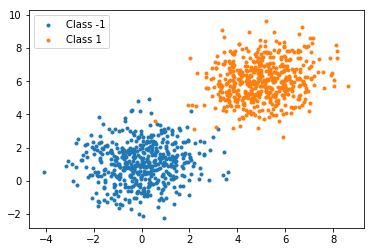

In [3]:
# visualising data
plt.scatter(dist_01[:, 0], dist_01[:, 1], marker = '.', label = 'Class -1')
plt.scatter(dist_02[:, 0], dist_02[:, 1], marker = '.', label = 'Class 1')
plt.legend()
plt.show()

In [4]:
# train test split
X = data[:, :-1]
Y = data[:, -1].reshape((-1, 1))

split_factor = 0.85
split = int(split_factor*data.shape[0])

X_train = X[:split, :]
Y_train = Y[:split, :]
X_test = X[split:, :]
Y_test = Y[split:, :]

print("Number of examples in training set = " + str(X_train.shape[0]))
print("Number of examples in testing set = " + str(X_test.shape[0]))

Number of examples in training set = 850
Number of examples in testing set = 150


In [5]:
def hingeloss(X, Y, w, b, c):
    l = 0.5*np.dot(w.T, w)
    for i in range(X.shape[0]):
        xi = X[i].reshape((-1, 1))
        yi = Y[i][0]
        ti = np.squeeze(yi*(np.dot(w.T, xi) + b))
        ei = max(0, (1 - ti))
        l += c*ei
    return np.squeeze(l)

def gradient(X, Y, w, b, c):
    grad_w = 0.0
    grad_b = 0.0
    for i in range(X.shape[0]):
        xi = X[i].reshape((-1, 1))
        yi = Y[i][0]
        ti = yi*(np.dot(w.T, xi) + b)
        if ti < 1:
            grad_w -= c*yi*xi
            grad_b -= c*yi
    grad_w += w
    return (grad_w, grad_b)

def plotHyperplane(w, b, c):
    w1 = w[0][0]
    w2 = w[1][0]
    x1 = np.linspace(-6.0, 10.0, 20)
    x2 = -(w1*x1 + b) / w2
    xp = -(w1*x1 + b - 1) / w2
    xn = -(w1*x1 + b + 1) / w2
    plt.figure(figsize=(10,6))
    plt.scatter(dist_01[:, 0], dist_01[:, 1], marker = '.', label = 'Class -1')
    plt.scatter(dist_02[:, 0], dist_02[:, 1], marker = '.', label = 'Class 1')
    plt.plot(x1, x2, color = "black", label = "Hyperplane")
    plt.plot(x1, xp, color = "orange", label = "+ve Hyperplane")
    plt.plot(x1, xn, color = "blue", label = "-ve Hyperplane")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Penalty Constant (c) = ' + str(c))
    plt.legend()
    plt.show()
    
def accuracy(X, Y, w, b):
    Y_pred = []
    for i in range(X.shape[0]):
        xi = X[i].reshape((-1, 1))
        di = np.dot(w.T, xi) + b
        if(di < 0):
            Y_pred.append(-1)
        else:
            Y_pred.append(1)
    Y_pred = np.array(Y_pred).reshape((-1, 1))
    acc = np.sum(Y == Y_pred) / Y.shape[0]
    return acc

def SVM(X, Y, learning_rate = 0.1, max_iters = 200, c = 0.01):
    w = np.random.random((X.shape[1], 1))
    b = np.random.random()
    loss_list = []
    for itr in range(max_iters):
        l = hingeloss(X, Y, w, b, c)
        loss_list.append(l)
        grad_w, grad_b = gradient(X, Y, w, b, c)
        w = w - learning_rate*grad_w
        b = b - learning_rate*grad_b
    return w, b, loss_list     

w =  [1.30511431 1.86810213]
b =  -10.458609543656


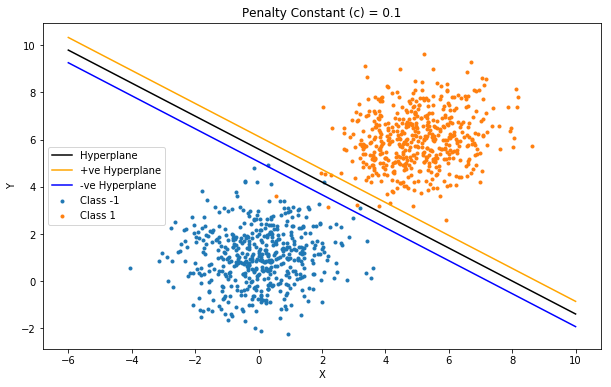

Accuracy on training set= 0.9952941176470588
Accuracy on testing set= 1.0


In [6]:
# visualizing hyperplane
w, b, loss_list = SVM(X_train, Y_train, c = 0.1)
print("w = ", w.reshape((-1, )))
print("b = ", b)
plotHyperplane(w, b, 0.1)
print("Accuracy on training set= " + str(accuracy(X_train, Y_train, w, b)))
print("Accuracy on testing set= " + str(accuracy(X_test, Y_test, w, b)))

w =  [5.52915546 6.54008782]
b =  -44.13645633005768


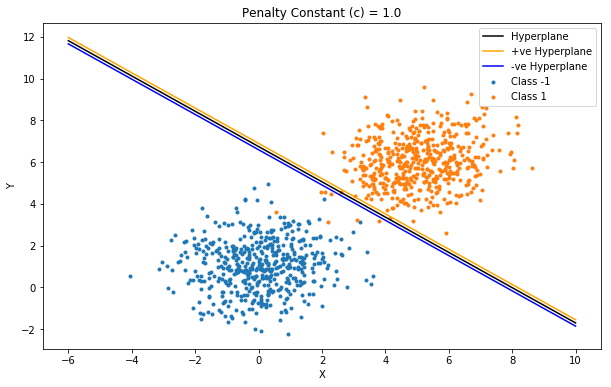

Accuracy on training set= 0.991764705882353
Accuracy on testing set= 1.0


In [7]:
# visualizing hyperplane
w, b, loss_list = SVM(X_train, Y_train, c = 1.0)
print("w = ", w.reshape((-1, )))
print("b = ", b)
plotHyperplane(w, b, 1.0)
print("Accuracy on training set= " + str(accuracy(X_train, Y_train, w, b)))
print("Accuracy on testing set= " + str(accuracy(X_test, Y_test, w, b)))

w =  [0.51259768 0.50632878]
b =  -3.0244616104789226


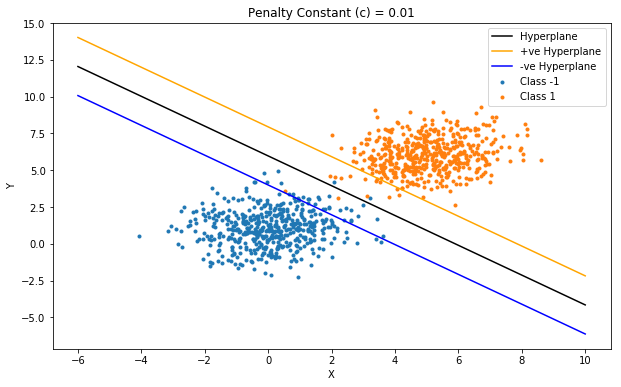

Accuracy on training set= 0.9952941176470588
Accuracy on testing set= 1.0


In [8]:
# visualizing hyperplane
w, b, loss_list = SVM(X_train, Y_train, c = 0.01)
print("w = ", w.reshape((-1, )))
print("b = ", b)
plotHyperplane(w, b, 0.01)
print("Accuracy on training set= " + str(accuracy(X_train, Y_train, w, b)))
print("Accuracy on testing set= " + str(accuracy(X_test, Y_test, w, b)))

w =  [0.26854686 0.26618587]
b =  -1.626806528388527


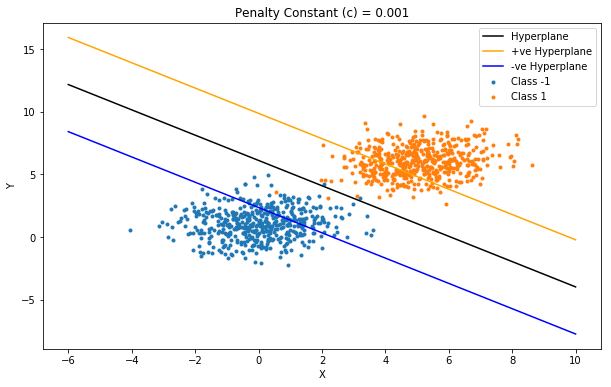

Accuracy on training set= 0.9952941176470588
Accuracy on testing set= 1.0


In [9]:
# visualizing hyperplane
w, b, loss_list = SVM(X_train, Y_train, c = 0.001)
print("w = ", w.reshape((-1, )))
print("b = ", b)
plotHyperplane(w, b, 0.001)
print("Accuracy on training set= " + str(accuracy(X_train, Y_train, w, b)))
print("Accuracy on testing set= " + str(accuracy(X_test, Y_test, w, b)))

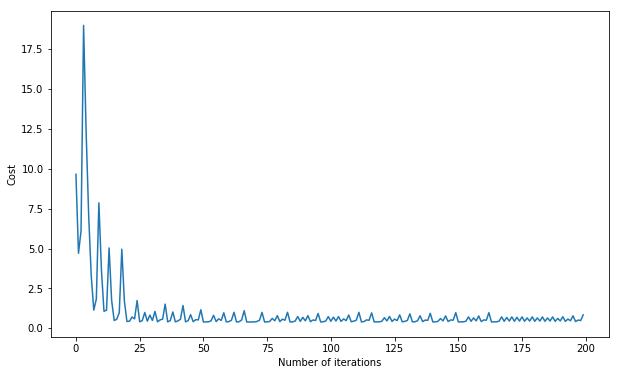

In [10]:
# visualizing change in cost
w, b, loss_list = SVM(X_train, Y_train)
plt.figure(figsize = (10, 6))
plt.plot(loss_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()